In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.integrate as spi

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Slides 
https://www.imperial.ac.uk/media/imperial-college/research-centres-and-groups/cfm-imperial-institute-of-quantitative-finance/events/imperial-eth-2016/Rama-Cont-1.pdf

In [2]:
d = pd.read_csv("ETHUSD_Ticks_01.12.2022-01.12.2022.csv", parse_dates = ['Gmt time'])
d = d.rename(
{
    'Gmt time': 'timestamp',
    'Ask' : 'askp',
    'Bid' : 'bidp',
    'AskVolume' : 'askv',
    'BidVolume' : 'bidv',
}, axis = 1)

In [20]:
options={'limit':300}
def calc_integral(n, p):
    integrand = lambda t :((2 - np.cos(t) - np.sqrt( (2-np.cos(t))**2 - 1 ))**p)*np.sin(n*t)*np.cos(t/2)/np.sin(t/2)
    a = 0.
    b = np.pi
    result, error = spi.nquad(integrand, [[a, b]], opts=options)
    return result/np.pi

#### Calculating probability that the next price move is an increase based on L1 OB data

In [21]:
integrals = []
bidv = d.bidv
askv = d.askv
for i in tqdm(range(len(d.bidv))):
    integrals.append(calc_integral(bidv[i], askv[i]))

100%|███████████████████████████████████████████████████████████████████████████████| 55068/55068 [02:04<00:00, 443.13it/s]


In [22]:
d["p"] = integrals

<AxesSubplot:>

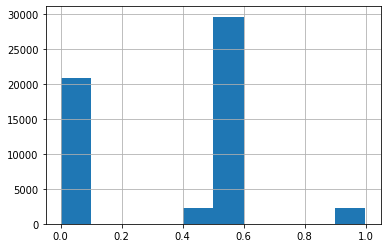

In [23]:
d.p.hist()

In [24]:
d["price"] = (d.askp + d.bidp)/2
d["sprice"] = d.price.shift(-1)
d["pricediff"] = d.sprice - d.price

In [25]:
longpredictions = d[d.p > 0.8]

In [26]:
longpredictions

,timestamp,askp,bidp,askv,bidv,p,price,sprice,pricediff
15404,2022-01-12 05:39:19.535,1282.0,1276.6,62,540,0.927225,1279.30,1279.35,0.05
26135,2022-01-12 10:40:25.748,1284.3,1279.3,1,540,0.998821,1281.80,1281.95,0.15
26136,2022-01-12 10:40:25.860,1284.6,1279.3,1,540,0.998821,1281.95,1281.90,-0.05
26137,2022-01-12 10:40:26.005,1284.6,1279.2,1,600,0.998939,1281.90,1282.05,0.15
26139,2022-01-12 10:41:50.367,1284.6,1279.6,1,540,0.998821,1282.10,1282.30,0.20
...,...,...,...,...,...,...,...,...,...
55056,2022-01-12 23:56:30.406,1278.1,1272.9,2,540,0.997642,1275.50,1275.60,0.10
55058,2022-01-12 23:58:35.168,1278.1,1273.2,2,540,0.997642,1275.65,1275.90,0.25
55060,2022-01-12 23:59:01.577,1278.4,1273.5,2,540,0.997642,1275.95,1276.25,0.30
55065,2022-01-12 23:59:54.336,1278.5,1273.6,2,540,0.997642,1276.05,1276.25,0.20


In [27]:
print("correct predictions: ",100*np.sum(longpredictions.pricediff > 0) / len(longpredictions), " %" )

correct predictions:  80.04357298474946  %


<AxesSubplot:>

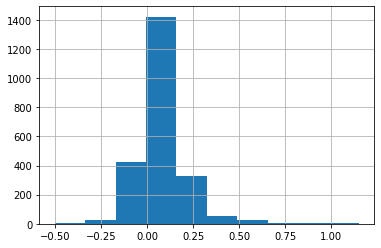

In [28]:
longpredictions.pricediff.hist()